In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.images, lfw_people.target

In [4]:
X = X / 255.0 # Normalize pixel values to be between 0 and 1



In [5]:
 X.shape

(1288, 50, 37)

In [6]:
X.shape[1] * X.shape[2] #Number of features (pixels)

1850

In [7]:
len(np.unique(y)) #Number of unique individuals

7

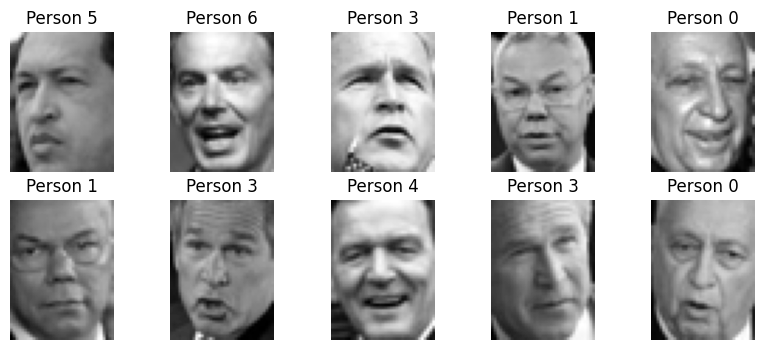

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Person {y[i]}')
    plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

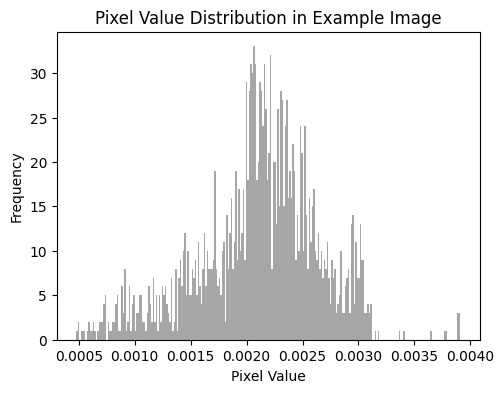

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(X[0].ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution in Example Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
all_labels_encoded = label_encoder.fit_transform(all_labels)

y_train_encoded = all_labels_encoded[:len(y_train)]
y_test_encoded = all_labels_encoded[len(y_train):]


In [12]:
label_encoder.classes_

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [13]:


# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2],1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(5749, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


print("X_train shape:", X_train_reshaped.shape)
print("X_test shape:", X_test_reshaped.shape)

X_train shape: (1030, 50, 37, 1)
X_test shape: (258, 50, 37, 1)


In [16]:
history = model.fit(X_train_reshaped, y_train_encoded, validation_data=(X_test_reshaped, y_test_encoded), epochs=10, batch_size=32)


Epoch 1/10


33/33 [==============================] - 3s 68ms/step - loss: 1.7437 - accuracy: 0.3903 - val_loss: 1.6395 - val_accuracy: 0.4612
Epoch 2/10
33/33 [==============================] - 2s 64ms/step - loss: 1.7096 - accuracy: 0.3990 - val_loss: 1.6162 - val_accuracy: 0.4612
Epoch 3/10
33/33 [==============================] - 2s 64ms/step - loss: 1.7191 - accuracy: 0.3990 - val_loss: 1.5988 - val_accuracy: 0.4612
Epoch 4/10
33/33 [==============================] - 2s 65ms/step - loss: 1.7105 - accuracy: 0.3990 - val_loss: 1.6032 - val_accuracy: 0.4612
Epoch 5/10
33/33 [==============================] - 2s 63ms/step - loss: 1.7078 - accuracy: 0.3990 - val_loss: 1.5982 - val_accuracy: 0.4612
Epoch 6/10
33/33 [==============================] - 2s 64ms/step - loss: 1.7117 - accuracy: 0.3990 - val_loss: 1.6065 - val_accuracy: 0.4612
Epoch 7/10
33/33 [==============================] - 2s 65ms/step - loss: 1.7057 - accuracy: 0.3990 - val_loss: 1.6020 - val_accuracy: 0.4612
Epoch 8/10


In [1]:
X_test_reshaped = np.expand_dims(X_test, axis=-1)

test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)


NameError: name 'model' is not defined

In [ ]:
test_accuracy

In [ ]:
model_aug = models.Sequential([
   layers.Conv2D(64, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2],1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [ ]:
model_aug.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    validation_data=(X_test, y_test_encoded),
    epochs=20
)


In [ ]:
model.save('aug_training_model.h5')
